In [1]:
# Include required libraries
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
print os.listdir("test_images/")
%matplotlib inline

['solidWhiteCurve.jpg', 'solidWhiteRight.jpg', 'solidYellowCurve.jpg', 'solidYellowCurve2.jpg', 'solidYellowLeft.jpg', 'whiteCarLaneSwitch.jpg']


In [2]:
def diffUpDown(img):
    # compare top and bottom size of the image
    # 1. cut image in two
    # 2. flip the top side
    # 3. resize to same size
    # 4. compare difference  
    height, width, depth = img.shape
    half = height/2
    top = img[0:half, 0:width]
    bottom = img[half:half+half, 0:width]
    top = cv2.flip(top,1)
    bottom = cv2.resize(bottom, (32, 64)) 
    top = cv2.resize(top, (32, 64))  
    return ( mse(top,bottom) )

def diffLeftRight(img):
    # compare left and right size of the image
    # 1. cut image in two
    # 2. flip the right side
    # 3. resize to same size
    # 4. compare difference  
    height, width, depth = img.shape
    half = width/2
    left = img[0:height, 0:half]
    right = img[0:height, half:half + half-1]
    right = cv2.flip(right,1)
    left = cv2.resize(left, (32, 64)) 
    right = cv2.resize(right, (32, 64))  
    return ( mse(left,right) )


def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def isNewRoi(rx,ry,rw,rh,rectangles):
    for r in rectangles:
        if abs(r[0] - rx) < 40 and abs(r[1] - ry) < 40:
           return False  
    return True

def detectRegionsOfInterest(frame, cascade):
    scaleDown = 2
    frameHeight, frameWidth, fdepth = frame.shape 

    # Resize
    frame = cv2.resize(frame, (frameWidth/scaleDown, frameHeight/scaleDown)) 
    frameHeight, frameWidth, fdepth = frame.shape 
 
    # haar detection.
    cars = cascade.detectMultiScale(frame, 1.2, 1)
 
    newRegions = []
    minY = int(frameHeight*0.3)

    # iterate regions of interest
    for (x,y,w,h) in cars:
            roi = [x,y,w,h]
            roiImage = frame[y:y+h, x:x+w]   

            carWidth = roiImage.shape[0]
            if y > minY:
                diffX = diffLeftRight(roiImage)
                diffY = round(diffUpDown(roiImage))

                if diffX > 1600 and diffX < 3000 and diffY > 12000:
                    rx,ry,rw,rh = roi
                    newRegions.append( [rx*scaleDown,ry*scaleDown,rw*scaleDown,rh*scaleDown] )

    return newRegions


In [3]:
def detectCars(img):
    rectangles = []
    cascade = cv2.CascadeClassifier('cars.xml')
    #vc = cv2.VideoCapture(filename)
 
    #if vc.isOpened():
    #    rval , frame = vc.read()
    #else:
    #    rval = False
 
    roi = [0,0,0,0]
    #frameCount = 0
 
    #while rval:
    #rval, frame = vc.read()
    frame = img
    frameHeight, frameWidth, fdepth = frame.shape 

    newRegions = detectRegionsOfInterest(frame, cascade)
    for region in newRegions:
        if isNewRoi(region[0],region[1],region[2],region[3],rectangles):
            rectangles.append(region)

    for r in rectangles:
        cv2.rectangle(frame,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(0,0,255),3) 

    #frameCount = frameCount + 1
    #if frameCount > 30: 
    #    frameCount = 0
    #    rectangles = []

    # show result
    #cv2.imshow("Result",frame)
    #print plt.imshow(image)
    #cv2.waitKey(1);
    #vc.release()
    return frame

AxesImage(60,40;372x248)


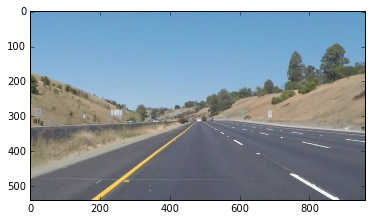

In [4]:
# Reading in an image
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
processed_image = detectCars(image)
print plt.imshow(processed_image)

AxesImage(60,40;372x248)


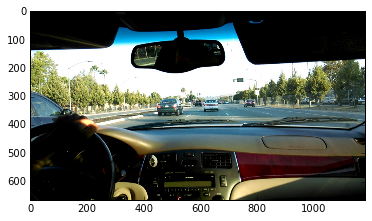

In [5]:
# Reading in an image
cars1 = mpimg.imread('test_images/cars1.jpg')
processed_cars1 = detectCars(cars1)
print plt.imshow(processed_cars1)